##### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##### Loading  the data


In [2]:
data=pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

###### Basic Checks


In [3]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [4]:
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


In [5]:
data=data.drop(['EmpNumber'],axis=1)

## Model Creation

In [24]:
## Creating independent and dependent variable
X = data.drop('PerformanceRating', axis=1)#independent variable 
y = data.PerformanceRating#dependent variable 

In [25]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=3)

In [26]:
# Checking the dimension of our train and test splits
print('Shape of x_train: ',X_train.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of x_test: ',X_test.shape)
print('Shape of y_test: ',y_test.shape)

Shape of x_train:  (900, 26)
Shape of y_train:  (900,)
Shape of x_test:  (300, 26)
Shape of y_test:  (300,)


## 1. Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier #importing decision tree from sklearn.tree
dt=DecisionTreeClassifier() #object creation for decision tree  
dt.fit(X_train, y_train) #training the model

DecisionTreeClassifier()

In [28]:
y_hat=dt.predict(X_train)#prediction
y_hat1=dt.predict(X_test)#prediction

In [29]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,recall_score,precision_score

In [30]:
print(classification_report(y_train,y_hat)) # train data

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       149
           3       1.00      1.00      1.00       647
           4       1.00      1.00      1.00       104

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [31]:
print(classification_report(y_test,y_hat1)) # test data

              precision    recall  f1-score   support

           2       0.77      0.82      0.80        45
           3       0.94      0.92      0.93       227
           4       0.76      0.79      0.77        28

    accuracy                           0.89       300
   macro avg       0.82      0.84      0.83       300
weighted avg       0.90      0.89      0.89       300



***observation:accuracy score of train data is 100% and that of test data is 89% hence the model is overfitted***

## Hyperparameter tunning for decision tree

In [32]:
from sklearn.model_selection import GridSearchCV

#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1,20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=3, cv=3)

#passing model to gridsearchCV 

#tree_cv.fit(X_train,y_train)#training data on gridsearch cv
#best_params = tree_cv.best_params_#it will give you best parameters 
#print(f"Best paramters: {best_params})")#printing  best parameters

In [33]:
dt1 = DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf= 1,min_samples_split=2,splitter='best')#passing best parameter to decision tree

In [34]:
dt1.fit(X_train, y_train)#traing model with best parameter

DecisionTreeClassifier(max_depth=6)

In [35]:
y_pred_train1  = dt1.predict(X_train)
y_hat1 = dt1.predict(X_test)#predicting

In [36]:
print(classification_report(y_train, y_pred_train1))   #train data

              precision    recall  f1-score   support

           2       0.91      0.92      0.92       149
           3       0.97      0.97      0.97       647
           4       0.94      0.94      0.94       104

    accuracy                           0.96       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.96      0.96      0.96       900



In [37]:
print(classification_report(y_test,y_hat1))#it will give precision,recall,f1 scores and accuracy #test data

              precision    recall  f1-score   support

           2       0.78      0.87      0.82        45
           3       0.95      0.93      0.94       227
           4       0.81      0.79      0.80        28

    accuracy                           0.91       300
   macro avg       0.85      0.86      0.85       300
weighted avg       0.91      0.91      0.91       300



***Observation:The accuracy of trained data after using hyperparameter tuning is 96% and that of test data is 91%***

## 2. RandomForest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
MR=RandomForestClassifier(n_estimators=100)
MR.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
rf_hat=MR.predict(X_train)#prediction
rf_pred=MR.predict(X_test)

In [40]:
print(classification_report(y_train,rf_hat))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       149
           3       1.00      1.00      1.00       647
           4       1.00      1.00      1.00       104

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [41]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           2       0.82      0.82      0.82        45
           3       0.94      0.96      0.95       227
           4       0.91      0.71      0.80        28

    accuracy                           0.92       300
   macro avg       0.89      0.83      0.86       300
weighted avg       0.92      0.92      0.92       300



***observation:accuracy score of train data is 100% and that of test data is 92% hence the model is overfitted***

## Hyperparameter tunning for RandomForest

In [42]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 100, num=10)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1,param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

#rf_cv.fit(X_train, y_train)##training data on randomsearch cv
#rf_best_params = rf_cv.best_params_##it will give you best parameters 
#print(f"Best paramters: {rf_best_params})")##printing  best parameters

In [43]:
rf_clf2 = RandomForestClassifier(n_estimators=400,min_samples_split=10,min_samples_leaf=1,max_features='sqrt',max_depth=30,bootstrap=True)#passing best parameter to randomforest
rf_clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=10,
                       n_estimators=400)

In [44]:
y_pred_train  = rf_clf2.predict(X_train)#training
y_predict=rf_clf2.predict(X_test)#testing

In [45]:
print(classification_report(y_train, y_pred_train))   #train data

              precision    recall  f1-score   support

           2       0.98      0.95      0.97       149
           3       0.97      1.00      0.98       647
           4       0.99      0.85      0.91       104

    accuracy                           0.97       900
   macro avg       0.98      0.93      0.95       900
weighted avg       0.97      0.97      0.97       900



In [46]:
print(classification_report(y_test, y_predict))   #test data

              precision    recall  f1-score   support

           2       0.87      0.87      0.87        45
           3       0.94      0.97      0.95       227
           4       0.95      0.71      0.82        28

    accuracy                           0.93       300
   macro avg       0.92      0.85      0.88       300
weighted avg       0.93      0.93      0.93       300



***Observation:The accuracy of trained data after using hyperparameter tuning is 97% and that of test data is 93%***

In [49]:
imp=rf_clf2.feature_importances_
imp

array([0.02768862, 0.00362939, 0.0102967 , 0.00673482, 0.04282833,
       0.04161624, 0.00567235, 0.02520531, 0.01352779, 0.2154587 ,
       0.03500421, 0.01161197, 0.01017177, 0.01011396, 0.01721147,
       0.00686158, 0.25835129, 0.01021014, 0.02257907, 0.0107934 ,
       0.0247964 , 0.02944128, 0.03954238, 0.09369393, 0.02110767,
       0.00585124])

<AxesSubplot:>

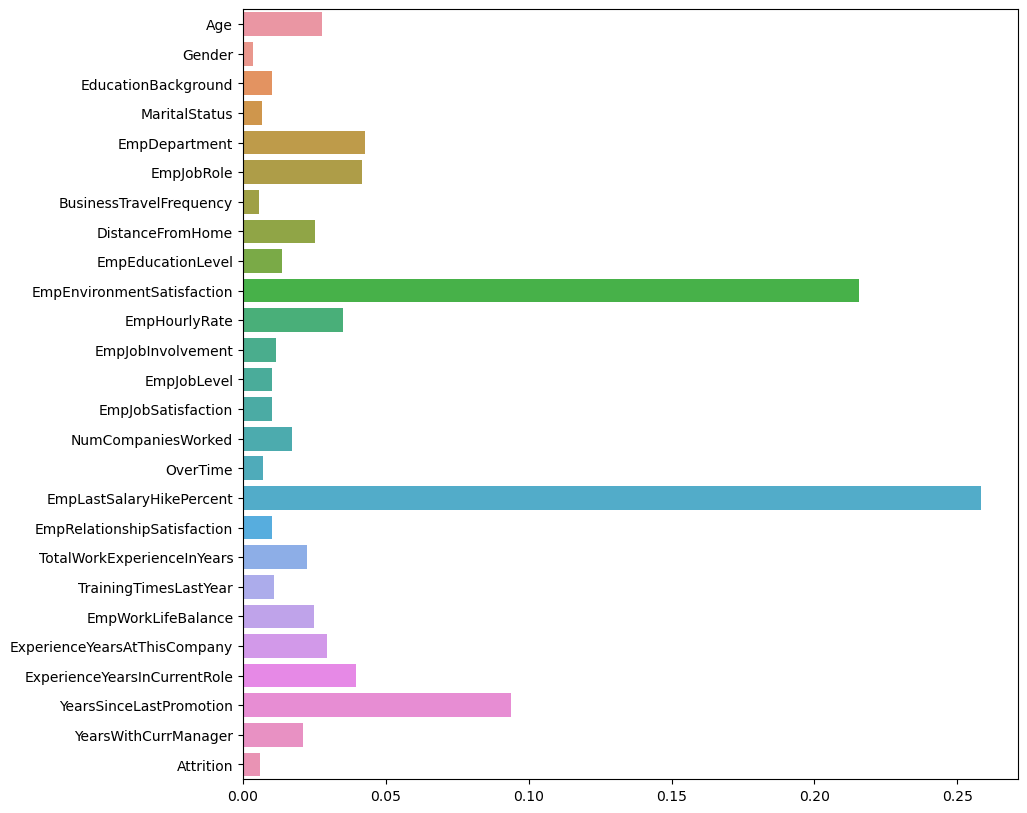

In [50]:
plt.figure(figsize=(10, 10))
sns.barplot(y=data.columns[:26],x=imp)

***Observation:The top 3 Important Factors effecting employee performance are: 'EmpLastSalaryHikePercent', 'EmpEnvironmentSatisfaction', 'YearsSinceLastPromotion'***

## 3. Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
dt=GradientBoostingClassifier()
dt.fit(X_train, y_train)

GradientBoostingClassifier()

In [52]:
y_pred2=dt.predict(X_train)
y_pred3=dt.predict(X_test)

In [53]:
print(classification_report(y_train,y_pred2))   #train data

              precision    recall  f1-score   support

           2       0.98      0.99      0.99       149
           3       1.00      1.00      1.00       647
           4       1.00      1.00      1.00       104

    accuracy                           1.00       900
   macro avg       0.99      1.00      0.99       900
weighted avg       1.00      1.00      1.00       900



In [54]:
print(classification_report(y_test, y_pred3)) #test data

              precision    recall  f1-score   support

           2       0.81      0.84      0.83        45
           3       0.94      0.96      0.95       227
           4       0.91      0.75      0.82        28

    accuracy                           0.92       300
   macro avg       0.89      0.85      0.87       300
weighted avg       0.92      0.92      0.92       300



***Observation:The accuracy of trained data is 100% and that of test data is 92 hence the model is overfitted%***

## Hyperparameter tunning for Gradient Boosting

In [55]:
gb_classifier = GradientBoostingClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5)



#grid_search.fit(X_train, y_train)
#best_params = grid_search.best_params_
#print("Best Hyperparameters:", best_params)

In [56]:
best_gb_classifier = GradientBoostingClassifier(learning_rate= 0.01, max_depth=3, n_estimators= 300)

In [57]:
# Fit the classifier to the training data
best_gb_classifier.fit(X_train, y_train)
# Make predictions on the test data
y_ht=best_gb_classifier.predict(X_train)
y_hat3_pr = best_gb_classifier.predict(X_test)

In [58]:
print(classification_report(y_train,y_ht))

              precision    recall  f1-score   support

           2       0.91      0.92      0.91       149
           3       0.96      0.98      0.97       647
           4       0.98      0.86      0.91       104

    accuracy                           0.95       900
   macro avg       0.95      0.92      0.93       900
weighted avg       0.95      0.95      0.95       900



In [59]:
print(classification_report(y_test,y_hat3_pr))

              precision    recall  f1-score   support

           2       0.78      0.87      0.82        45
           3       0.95      0.95      0.95       227
           4       0.95      0.75      0.84        28

    accuracy                           0.92       300
   macro avg       0.89      0.86      0.87       300
weighted avg       0.92      0.92      0.92       300



***Observation:The accuracy of trained data is 95% and that of test data is 92%***

## 4. Artificial Neural Network

#Training the model

In [60]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
mlp.fit(X_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

In [61]:
y_hat_mlp = mlp.predict(X_train)
y_predict_mlp = mlp.predict(X_test)

In [62]:
print(classification_report(y_train,y_hat_mlp))

              precision    recall  f1-score   support

           2       0.58      0.40      0.48       149
           3       0.76      0.93      0.84       647
           4       0.00      0.00      0.00       104

    accuracy                           0.74       900
   macro avg       0.45      0.45      0.44       900
weighted avg       0.64      0.74      0.68       900



In [63]:
print(classification_report(y_test,y_predict_mlp))

              precision    recall  f1-score   support

           2       0.62      0.47      0.53        45
           3       0.80      0.94      0.87       227
           4       0.00      0.00      0.00        28

    accuracy                           0.78       300
   macro avg       0.47      0.47      0.47       300
weighted avg       0.70      0.78      0.74       300



***Observation:The accuracy of trained data is 74% and that of test data is 78%***

## 5. Logistic Regression 

### Scaling data

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)

In [65]:
X_train,X_test,y_train,y_test=train_test_split(scaled_data, y,random_state=3)

In [66]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [67]:
y_pred1 = LR.predict(X_train)
y_pred = LR.predict(X_test)

In [68]:
print(classification_report(y_train, y_pred1)) #train data

              precision    recall  f1-score   support

           2       0.59      0.42      0.49       149
           3       0.84      0.92      0.88       647
           4       0.83      0.67      0.74       104

    accuracy                           0.81       900
   macro avg       0.76      0.67      0.71       900
weighted avg       0.80      0.81      0.80       900



In [69]:
print(classification_report(y_test, y_pred)) #test data

              precision    recall  f1-score   support

           2       0.54      0.47      0.50        45
           3       0.88      0.91      0.89       227
           4       0.73      0.68      0.70        28

    accuracy                           0.82       300
   macro avg       0.72      0.68      0.70       300
weighted avg       0.81      0.82      0.82       300



***Observation:Accuracy of trained data is 81% and that of test data is 82%***

## 6. Support Vector Machine

In [70]:
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default pbarameters
svclassifier.fit(X_train, y_train)

SVC()

In [71]:
sv_hat=svclassifier.predict(X_train)#prediction
y_hat=svclassifier.predict(X_test)

In [72]:
print(classification_report(y_train,sv_hat))

              precision    recall  f1-score   support

           2       0.98      0.59      0.74       149
           3       0.88      1.00      0.93       647
           4       0.99      0.72      0.83       104

    accuracy                           0.90       900
   macro avg       0.95      0.77      0.83       900
weighted avg       0.91      0.90      0.89       900



In [73]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           2       0.57      0.27      0.36        45
           3       0.81      0.96      0.88       227
           4       0.91      0.36      0.51        28

    accuracy                           0.80       300
   macro avg       0.76      0.53      0.59       300
weighted avg       0.79      0.80      0.77       300



***Observation:The accuracy of trained data is 90% and that of test data is 80%***

## Bagging for Support Vector Machine

In [74]:
from sklearn.ensemble import BaggingClassifier#import bagging 
model_bagg1=BaggingClassifier(base_estimator=svclassifier,n_estimators=20) ## model objet creation
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners
model_bagg1.fit(X_train,y_train) ## fitting the model

BaggingClassifier(base_estimator=SVC(), n_estimators=20)

In [75]:
y_hat_bagg=model_bagg1.predict(X_test) ## getting the prediction
y_hat_bagg1=model_bagg1.predict(X_train)

In [76]:
print(classification_report(y_train,y_hat_bagg1))

              precision    recall  f1-score   support

           2       0.97      0.66      0.78       149
           3       0.89      0.99      0.94       647
           4       0.98      0.76      0.85       104

    accuracy                           0.91       900
   macro avg       0.95      0.80      0.86       900
weighted avg       0.92      0.91      0.90       900



In [77]:
print(classification_report(y_test,y_hat_bagg))

              precision    recall  f1-score   support

           2       0.62      0.29      0.39        45
           3       0.82      0.96      0.89       227
           4       0.79      0.39      0.52        28

    accuracy                           0.81       300
   macro avg       0.74      0.55      0.60       300
weighted avg       0.79      0.81      0.78       300



***Observation:The accuracy of trained data is 91% and that of test data is 81%***

## 7. K Nearest Neighbour

In [78]:
from sklearn.neighbors import KNeighborsClassifier#USING KNN
KNN1=KNeighborsClassifier(n_neighbors=5) ## model object creation
KNN1.fit(X_train,y_train)  ## fitting the model

KNeighborsClassifier()

In [79]:
y_hat_knn=KNN1.predict(X_test) ## getting the predict from created model
knn_tr=KNN1.predict(X_train)

In [80]:
print(classification_report(y_train,knn_tr))

              precision    recall  f1-score   support

           2       0.68      0.42      0.52       149
           3       0.81      0.96      0.88       647
           4       0.90      0.37      0.52       104

    accuracy                           0.80       900
   macro avg       0.80      0.58      0.64       900
weighted avg       0.80      0.80      0.78       900



In [81]:
print(classification_report(y_test,y_hat_knn))

              precision    recall  f1-score   support

           2       0.37      0.31      0.34        45
           3       0.80      0.90      0.84       227
           4       0.50      0.11      0.18        28

    accuracy                           0.74       300
   macro avg       0.56      0.44      0.45       300
weighted avg       0.70      0.74      0.71       300



***Observation:The accuracy of trained data is 80% and that of test data is 74%***

## Principal Component Analysis

In [82]:
df=pd.DataFrame(data=scaled_data,columns=X.columns)

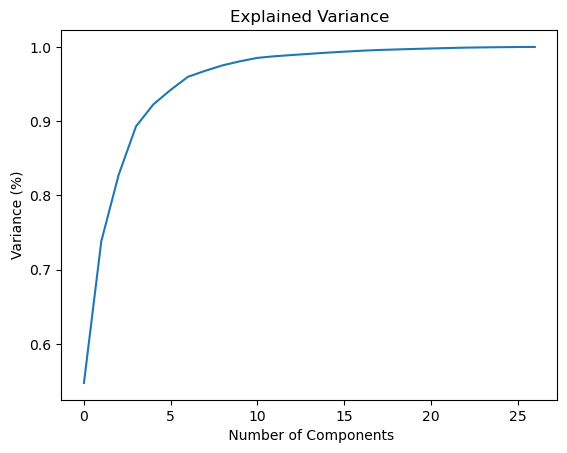

In [83]:
## Getting the optimal number of PCA
from sklearn.decomposition import PCA
pca=PCA()
principalComponents=pca.fit_transform(data)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel(" Number of Components")
plt.ylabel('Variance (%)') # for each components
plt.title("Explained Variance")
plt.show()

In [84]:
pca=PCA(n_components=10)
new_data=pca.fit_transform(df)
i=1
for i in range(1,10):
    i=i+1
    print(i)
principal_df=pd.DataFrame(data=new_data,columns=print(i))

2
3
4
5
6
7
8
9
10
10


In [85]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.16024778 0.22821741 0.28754385 0.33739406 0.38298552 0.42628867
 0.46876197 0.51077208 0.5512195  0.59000396]


## Fitting Models after Principal Component Analysis

# Logistic Regression with Principal Component Analysis

In [86]:
scaled_data=scaler.fit_transform(new_data)

In [87]:
X_train_pca,X_test_pca,y_train,y_test=train_test_split(scaled_data, y,random_state=3)

In [88]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_pca, y_train)

LogisticRegression()

In [89]:
y_pred1 = LR.predict(X_train_pca)
y_pred = LR.predict(X_test_pca)

In [90]:
print(classification_report(y_test, y_pred)) #test data

              precision    recall  f1-score   support

           2       0.58      0.31      0.41        45
           3       0.82      0.94      0.87       227
           4       0.47      0.25      0.33        28

    accuracy                           0.78       300
   macro avg       0.62      0.50      0.53       300
weighted avg       0.75      0.78      0.75       300



In [91]:
print(classification_report(y_train, y_pred1)) #train data

              precision    recall  f1-score   support

           2       0.59      0.23      0.34       149
           3       0.77      0.95      0.85       647
           4       0.51      0.19      0.28       104

    accuracy                           0.74       900
   macro avg       0.62      0.46      0.49       900
weighted avg       0.71      0.74      0.70       900



***Observation:Accuracy of train & test are reducing after fitting pca for logistic regression.***

## RandomForest Classifier with Principal Component Analysis

In [92]:
from sklearn.ensemble import RandomForestClassifier
MR=RandomForestClassifier(n_estimators=100)
MR.fit(X_train_pca,y_train)

RandomForestClassifier()

In [93]:
rf_hat=MR.predict(X_train_pca)#prediction
rf_pred=MR.predict(X_test_pca)

In [94]:
print(classification_report(y_train,rf_hat))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       149
           3       1.00      1.00      1.00       647
           4       1.00      1.00      1.00       104

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [95]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           2       0.52      0.24      0.33        45
           3       0.78      0.95      0.86       227
           4       0.40      0.07      0.12        28

    accuracy                           0.76       300
   macro avg       0.57      0.42      0.44       300
weighted avg       0.71      0.76      0.71       300



***Observation:This also shows our data is overfit since trained data gives an accuracy of 100% and tested data gives that of 76%.***

## Hyperparameter tunning for RandomForest with Principal Component Analysis

In [96]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 100, num=10)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1,param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

#rf_cv.fit(X_train, y_train)##training data on randomsearch cv
#rf_best_params = rf_cv.best_params_##it will give you best parameters 
#print(f"Best paramters: {rf_best_params})")##printing  best parameters

rf_clf2 = RandomForestClassifier(n_estimators=400,min_samples_split=10,min_samples_leaf=1,max_features='sqrt',max_depth=30,bootstrap=True)#passing best parameter to randomforest
rf_clf2.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=10,
                       n_estimators=400)

In [97]:
y_predict=rf_clf2.predict(X_test_pca)#testing
y_pred_train  = rf_clf2.predict(X_train_pca)#training

In [98]:
print(classification_report(y_train, y_pred_train))   

              precision    recall  f1-score   support

           2       0.99      0.74      0.85       149
           3       0.89      1.00      0.94       647
           4       1.00      0.59      0.74       104

    accuracy                           0.91       900
   macro avg       0.96      0.78      0.84       900
weighted avg       0.92      0.91      0.90       900



In [99]:
print(classification_report(y_test, y_predict))   #test data

              precision    recall  f1-score   support

           2       0.43      0.13      0.20        45
           3       0.77      0.96      0.85       227
           4       0.40      0.07      0.12        28

    accuracy                           0.75       300
   macro avg       0.53      0.39      0.39       300
weighted avg       0.69      0.75      0.69       300



***Observation:Accuracy of train & test are reducing after fitting pca random forest model also.***